# Prelim results of approximate coding with GD on Amazone Employee dataset

In [20]:
import numpy as np
import re

In [21]:
file_list = []
for s in ('1', '3'):
    for frac in ('50', '60', '80'):
        file_list.append("s_{}_frac_{}".format(s, frac))
file_list += ['vanilla_gd']

In [22]:
stats = {}
for _f in file_list:
    tmp_stat_dict = {}
    print("Processing {} ...".format(_f))
    with open(_f, 'rb') as log_file:
        for line in log_file.readlines():
            line_string = line.rstrip('\n')
            match_elem = re.match("Iteration (.*): Train Loss = (.*), Test Loss = (.*), AUC = (.*), Total time taken =(.*)", line_string)
            if match_elem:
                num_iter, train_loss, test_loss, auc, step_time = int(match_elem.group(1)), float(match_elem.group(2)), float(match_elem.group(3)), float(match_elem.group(4)), float(match_elem.group(5))
                if num_iter == 0:
                    tmp_stat_dict['train_loss'] = [train_loss]
                    tmp_stat_dict['test_loss'] = [test_loss]
                    tmp_stat_dict['auc'] = [auc]
                    tmp_stat_dict['time_stamp'] = [step_time]
                else:
                    tmp_stat_dict['train_loss'].append(train_loss)
                    tmp_stat_dict['test_loss'].append(test_loss)
                    tmp_stat_dict['auc'].append(auc)
                    tmp_stat_dict['time_stamp'].append(step_time+tmp_stat_dict['time_stamp'][-1])
    stats[_f] = tmp_stat_dict

Processing s_1_frac_50 ...
Processing s_1_frac_60 ...
Processing s_1_frac_80 ...
Processing s_3_frac_50 ...
Processing s_3_frac_60 ...
Processing s_3_frac_80 ...
Processing vanilla_gd ...


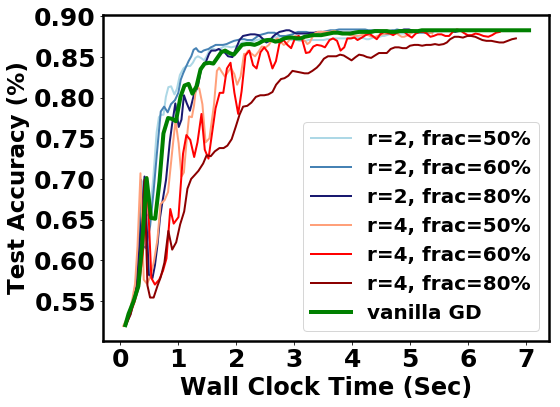

In [29]:
from matplotlib import colors as mcolors
from pylab import *
import numpy as np

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())

rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

plt.plot(stats['s_1_frac_50']['time_stamp'], stats['s_1_frac_50']['auc'], color=colors['lightblue'], linewidth=2.0, label='r=2, frac=50%')
plt.plot(stats['s_1_frac_60']['time_stamp'], stats['s_1_frac_60']['auc'], color=colors['steelblue'], linewidth=2.0, label='r=2, frac=60%')
plt.plot(stats['s_1_frac_80']['time_stamp'], stats['s_1_frac_80']['auc'], color=colors['midnightblue'], linewidth=2.0, label='r=2, frac=80%')

plt.plot(stats['s_3_frac_50']['time_stamp'], stats['s_3_frac_50']['auc'], color=colors['lightsalmon'], linewidth=2.0, label='r=4, frac=50%')
plt.plot(stats['s_3_frac_60']['time_stamp'], stats['s_3_frac_60']['auc'], color=colors['red'], linewidth=2.0, label='r=4, frac=60%')
plt.plot(stats['s_3_frac_80']['time_stamp'], stats['s_3_frac_80']['auc'], color=colors['darkred'], linewidth=2.0, label='r=4, frac=80%')

plt.plot(stats['vanilla_gd']['time_stamp'], stats['vanilla_gd']['auc'], color=colors['g'], linewidth=4.0, label='vanilla GD')

plt.xlabel("Wall Clock Time (Sec)",fontsize=24, fontweight='bold')
plt.ylabel("Test Accuracy (%)",fontsize=23, fontweight='bold')
plt.xticks(size=25, fontweight='bold')
plt.yticks(size=25, fontweight='bold')

legend_properties = {'weight':'bold', 'size':20}
ax.xaxis.get_offset_text().set_fontsize(22)
ax.xaxis.get_offset_text().set_weight('bold')
plt.legend(prop=legend_properties)